In [1]:
import numpy as np
import pandas as pd
np.random.seed(44)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", palette="rainbow")
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
os.chdir('/home/ruben.solozabal/l/projects/Job-Shop/')

## CL Strategies Plot

In [96]:
tables = pd.read_excel('tables/tables.xlsx', sheet_name=4)
tables

,(Zhang et al. 2020),%,Unnamed: 2,Unnamed: 3,classic,%.1,Unnamed: 6,Unnamed: 7,base,%.2,...,Adaptive CL,%.4,Unnamed: 18,Unnamed: 19,Adversarial CL,%.5,Unnamed: 22,Unnamed: 23,UB,Unnamed: 25
0,1443,17.221771,NaN,NaN,1475,19.821284,NaN,NaN,1475,19.821284,...,1387,12.672624,NaN,NaN,1379,12.022746,NaN,NaN,1231,NaN
1,1544,24.115756,NaN,NaN,1401,12.620579,NaN,NaN,1401,12.620579,...,1336,7.395498,NaN,NaN,1325,6.511254,NaN,NaN,1244,NaN
2,1440,18.226601,NaN,NaN,1393,14.367816,NaN,NaN,1393,14.367816,...,1341,10.098522,NaN,NaN,1338,9.852217,NaN,NaN,1218,NaN
3,1637,39.319149,NaN,NaN,1340,14.042553,NaN,NaN,1340,14.042553,...,1305,11.063830,NaN,NaN,1275,8.510638,NaN,NaN,1175,NaN
4,1619,32.271242,NaN,NaN,1390,13.562092,NaN,NaN,1390,13.562092,...,1329,8.578431,NaN,NaN,1303,6.454248,NaN,NaN,1224,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,6135,14.844627,NaN,NaN,6060,13.440659,NaN,NaN,6112,14.414077,...,5714,6.963684,NaN,NaN,5748,7.600150,NaN,NaN,5342,NaN
76,6056,11.405445,NaN,NaN,5935,9.179544,NaN,NaN,5999,10.356880,...,5655,4.028698,NaN,NaN,5588,2.796174,NaN,NaN,5436,NaN
77,6101,13.107156,NaN,NaN,6153,14.071190,NaN,NaN,6294,16.685206,...,5735,6.321839,NaN,NaN,5570,3.262885,NaN,NaN,5394,NaN
78,5943,10.918253,6097.600000,NaN,5945,10.955580,6036.8000,NaN,5995,11.888764,...,5567,3.900709,5682.10000,NaN,5424,1.231803,5578.900000,NaN,5358,NaN


In [97]:
tables_plot = tables[['%.1', '%.2', '%.3', '%.4', '%.5']]
tables_plot.columns = ['ICL', 'Base', 'UCL', 'ASCL', 'RASCL']
tables_plot = tables_plot.round(2)

In [98]:
tables_plot_main = pd.DataFrame(columns=['Strategies', 'Sizes', 'Optimality gap (in percent %)'])
sizes = [[15, 15], [20, 15], [20, 20], [30, 15], [30, 20], [50, 15], [50, 20], [100, 20]]
columns = tables_plot.columns
j = 0
for i in range(len(tables_plot)):
    row = tables_plot.iloc[i]
    index = i//10
    size = str(sizes[index][0]) + 'x' + str(sizes[index][1])
    for column in columns:
        value = row[column]
        new_row = [column, size, value]
        tables_plot_main.loc[j] = new_row
        j += 1
        
tables_plot_main

,Strategies,Sizes,Optimality gap (in percent %)
0,ICL,15x15,19.82
1,Base,15x15,19.82
2,UCL,15x15,13.16
3,ASCL,15x15,12.67
4,RASCL,15x15,12.02
...,...,...,...
395,ICL,100x20,12.27
396,Base,100x20,13.97
397,UCL,100x20,8.80
398,ASCL,100x20,5.73


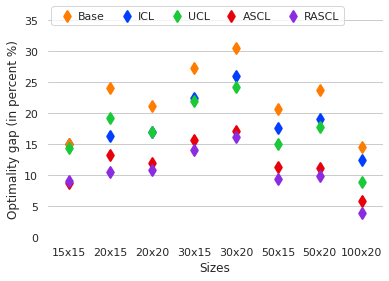

In [99]:
f, ax = plt.subplots()
sns.despine(bottom=True, left=True)

sns.stripplot(x="Sizes", y="Optimality gap (in percent %)", hue="Strategies",
              data=tables_plot_main, dodge=False, alpha=0.0, zorder=1)

sns.pointplot(x="Sizes", y="Optimality gap (in percent %)", hue="Strategies",
              data=tables_plot_main, dodge=False,
              join=False, palette="bright",
              markers="d", scale=1.1, ci=None)

handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend([handles[6]] + [handles[5]] + handles[7:], [labels[6]] + [labels[5]] + labels[7:], title="",
          handletextpad=0, columnspacing=1,
          loc="lower right", bbox_to_anchor=(0.9, 0.95), ncol=5, frameon=True)

plt.ylim(0, 35)
plt.savefig("output_logs/plots/cl_plot.pdf", format="pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')


## Selection Strategies Plot

In [100]:
tables = pd.read_excel('tables/tables.xlsx', sheet_name=1)
tables

,Greedy,%,Unnamed: 2,Unnamed: 3,POMO,%.1,Unnamed: 6,Unnamed: 7,Sampling,%.2,...,Beam,%.3,Unnamed: 14,Unnamed: 15,UB,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,1445,17.384240,NaN,NaN,1445,17.384240,NaN,NaN,1379,12.022746,...,1421,15.434606,NaN,NaN,1231,NaN,NaN,NaN,NaN,NaN
1,1405,12.942122,NaN,NaN,1405,12.942122,NaN,NaN,1325,6.511254,...,1390,11.736334,NaN,NaN,1244,NaN,NaN,NaN,NaN,NaN
2,1469,20.607553,NaN,NaN,1344,10.344828,NaN,NaN,1338,9.852217,...,1405,15.353038,NaN,NaN,1218,NaN,NaN,NaN,NaN,NaN
3,1304,10.978723,NaN,NaN,1304,10.978723,NaN,NaN,1275,8.510638,...,1304,10.978723,NaN,NaN,1175,NaN,NaN,NaN,NaN,NaN
4,1345,9.885621,NaN,NaN,1345,9.885621,NaN,NaN,1303,6.454248,...,1326,8.333333,NaN,NaN,1224,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,5859,9.678023,NaN,NaN,5858,9.659304,NaN,NaN,5748,7.600150,...,5935,11.100711,NaN,NaN,5342,NaN,NaN,NaN,NaN,NaN
76,5677,4.433407,NaN,NaN,5657,4.065489,NaN,NaN,5588,2.796174,...,5663,4.175865,NaN,NaN,5436,NaN,NaN,NaN,NaN,NaN
77,5699,5.654431,NaN,NaN,5604,3.893215,NaN,NaN,5570,3.262885,...,5541,2.725250,NaN,NaN,5394,NaN,NaN,NaN,NaN,NaN
78,5548,3.546099,5680.900000,NaN,5484,2.351624,5633.300000,NaN,5424,1.231803,...,5488,2.426278,5637.500000,NaN,5358,NaN,NaN,NaN,NaN,NaN


In [101]:
tables_plot = tables[['%', '%.1', '%.2', '%.3']]
tables_plot.columns = ['Greedy', 'POMO', 'Sampling', 'Beam']
tables_plot = tables_plot.round(2)

In [102]:
tables_plot_main = pd.DataFrame(columns=['Models', 'Sizes', 'Optimality gap (in percent %)'])
sizes = [[15, 15], [20, 15], [20, 20], [30, 15], [30, 20], [50, 15], [50, 20], [100, 20]]
columns = tables_plot.columns
j = 0
for i in range(len(tables_plot)):
    row = tables_plot.iloc[i]
    index = i//10
    size = str(sizes[index][0]) + 'x' + str(sizes[index][1])
    for column in columns:
        value = row[column]
        new_row = [column, size, value]
        tables_plot_main.loc[j] = new_row
        j += 1
        
tables_plot_main

,Models,Sizes,Optimality gap (in percent %)
0,Greedy,15x15,17.38
1,POMO,15x15,17.38
2,Sampling,15x15,12.02
3,Beam,15x15,15.43
4,Greedy,15x15,12.94
...,...,...,...
315,Beam,100x20,2.43
316,Greedy,100x20,3.86
317,POMO,100x20,3.86
318,Sampling,100x20,3.01


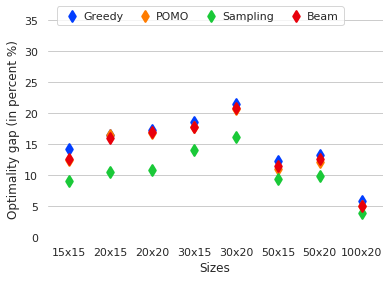

In [103]:
f, ax = plt.subplots()
sns.despine(bottom=True, left=True)

sns.stripplot(x="Sizes", y="Optimality gap (in percent %)", hue="Models",
              data=tables_plot_main, dodge=False, alpha=0.0, zorder=1)

sns.pointplot(x="Sizes", y="Optimality gap (in percent %)", hue="Models",
              data=tables_plot_main, dodge=False,
              join=False, palette="bright",
              markers="d", scale=1.1, ci=None)
sns.set_style(style='whitegrid') 

handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles[4:], labels[4:], title="",
          handletextpad=0, columnspacing=1,
          loc="lower right", bbox_to_anchor=(0.9, 0.95), ncol=5, frameon=True)

plt.ylim(0, 35)
plt.savefig("output_logs/plots/select_plot.pdf", format="pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')

In [104]:
##  Plot heatmap Base

In [105]:
tables_base = pd.read_excel('./tables/tables.xlsx', sheet_name=3)
tables_base

,15 15,%,Unnamed: 2,Unnamed: 3,20 15,%.1,Unnamed: 6,Unnamed: 7,20 20,%.2,...,30 15,%.3,Unnamed: 14,Unnamed: 15,30 20,%.4,Unnamed: 18,Unnamed: 19,UB,Unnamed: 21
0,1475,19.821284,NaN,NaN,1492,21.202275,NaN,NaN,1466,19.090171,...,1443,17.221771,NaN,NaN,1477,19.983753,NaN,NaN,1231,NaN
1,1401,12.620579,NaN,NaN,1429,14.871383,NaN,NaN,1437,15.514469,...,1463,17.604502,NaN,NaN,1445,16.157556,NaN,NaN,1244,NaN
2,1393,14.367816,NaN,NaN,1476,21.182266,NaN,NaN,1470,20.689655,...,1484,21.839080,NaN,NaN,1481,21.592775,NaN,NaN,1218,NaN
3,1340,14.042553,NaN,NaN,1437,22.297872,NaN,NaN,1435,22.127660,...,1470,25.106383,NaN,NaN,1513,28.765957,NaN,NaN,1175,NaN
4,1390,13.562092,NaN,NaN,1409,15.114379,NaN,NaN,1451,18.545752,...,1464,19.607843,NaN,NaN,1486,21.405229,NaN,NaN,1224,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,6033,12.935230,NaN,NaN,6140,14.938225,NaN,NaN,6178,15.649569,...,6150,15.125421,NaN,NaN,6112,14.414077,NaN,NaN,5342,NaN
76,5865,7.891832,NaN,NaN,5982,10.044150,NaN,NaN,6004,10.448859,...,5980,10.007358,NaN,NaN,5999,10.356880,NaN,NaN,5436,NaN
77,5818,7.860586,NaN,NaN,6250,15.869485,NaN,NaN,6146,13.941416,...,6311,17.000371,NaN,NaN,6294,16.685206,NaN,NaN,5394,NaN
78,5848,9.145203,5879.900000,NaN,6101,13.867115,6120.900000,NaN,6040,12.728630,...,6081,13.493841,6153.500000,NaN,5995,11.888764,6145.500000,NaN,5358,NaN


In [106]:
tables_plot = tables_base[['%', '%.1', '%.2', '%.3', '%.4']]
tables_plot.columns = ['15x15', '20x15', '20x20', '30x15', '30x20']
tables_plot = tables_plot.round(2)
tables_plot

,15x15,20x15,20x20,30x15,30x20
0,19.82,21.20,19.09,17.22,19.98
1,12.62,14.87,15.51,17.60,16.16
2,14.37,21.18,20.69,21.84,21.59
3,14.04,22.30,22.13,25.11,28.77
4,13.56,15.11,18.55,19.61,21.41
...,...,...,...,...,...
75,12.94,14.94,15.65,15.13,14.41
76,7.89,10.04,10.45,10.01,10.36
77,7.86,15.87,13.94,17.00,16.69
78,9.15,13.87,12.73,13.49,11.89


In [107]:
tables_plot_main = pd.DataFrame(columns=['Models', 'Sizes', 'Gap'])
sizes = [[15, 15], [20, 15], [20, 20], [30, 15], [30, 20], [50, 15], [50, 20], [100, 20]]
columns = tables_plot.columns
j = 0
for i in range(len(tables_plot)):
    row = tables_plot.iloc[i]
    index = i//10
    size = str(sizes[index][0]) + 'x' + str(sizes[index][1])
    for column in columns:
        value = row[column]
        new_row = [column, size, value]
        tables_plot_main.loc[j] = new_row
        j += 1
        
tables_plot_main

,Models,Sizes,Gap
0,15x15,15x15,19.82
1,20x15,15x15,21.20
2,20x20,15x15,19.09
3,30x15,15x15,17.22
4,30x20,15x15,19.98
...,...,...,...
395,15x15,100x20,8.37
396,20x15,100x20,13.91
397,20x20,100x20,12.48
398,30x15,100x20,14.12


(0.0, 35.0)

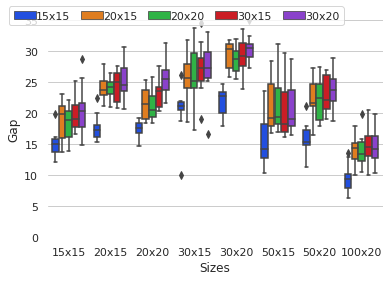

In [108]:
f, ax = plt.subplots()
sns.despine(bottom=True, left=True)

sns.boxplot(x="Sizes", y="Gap", hue="Models", palette="bright",
            data=tables_plot_main)

sns.set_style(style='whitegrid') 

handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles[0:], labels[0:], title="",
          handletextpad=0, columnspacing=1,
          loc="lower right", bbox_to_anchor=(0.9, 0.95), ncol=5, frameon=True)
# lgd = ax.legend(handles[4:], labels[4:], title="",
#           handletextpad=0, columnspacing=1,
#           loc="lower right", bbox_to_anchor=(0.9, 0.95), ncol=5, frameon=True)
plt.ylim(0, 35)

In [109]:
tables_plot_= tables_plot.groupby(np.arange(len(tables_plot))//10).mean()
tables_plot_= tables_plot_.rename(index={0: "15x15", 1: "20x15", 2: "20x20", 3: '30x15', 4: '30x20', 5: "50x15", 6: '50x20', 7: '100x20'})

tables_plot_ = tables_plot_ *0.01
tables_plot_

,15x15,20x15,20x20,30x15,30x20
15x15,0.14977,0.18970,0.18229,0.19705,0.20586
20x15,0.17688,0.23967,0.23991,0.24295,0.25308
20x20,0.17367,0.21490,0.21106,0.23042,0.25474
30x15,0.20413,0.25857,0.26138,0.27187,0.27271
30x20,0.21919,0.29215,0.28520,0.29192,0.30397
50x15,0.15670,0.21065,0.21274,0.20333,0.20691
50x20,0.15948,0.22251,0.22152,0.22957,0.23728
100x20,0.09577,0.14063,0.13856,0.14669,0.14521


In [110]:
def percentage_change(col1,col2):
    return ((col2 - col1)) 

In [111]:
tables_plot_diff = tables_plot_.copy()

for column in tables_plot_.columns[1:]:
    tables_plot_diff[column] = percentage_change(tables_plot_["15x15"],tables_plot_[column])

tables_plot_diff["15x15"] = percentage_change(tables_plot_["15x15"],tables_plot_["15x15"])

tables_plot_diff = tables_plot_diff * 100

In [112]:
tables_plot_diff

,15x15,20x15,20x20,30x15,30x20
15x15,0.0,3.993,3.252,4.728,5.609
20x15,0.0,6.279,6.303,6.607,7.620
20x20,0.0,4.123,3.739,5.675,8.107
30x15,0.0,5.444,5.725,6.774,6.858
30x20,0.0,7.296,6.601,7.273,8.478
50x15,0.0,5.395,5.604,4.663,5.021
50x20,0.0,6.303,6.204,7.009,7.780
100x20,0.0,4.486,4.279,5.092,4.944


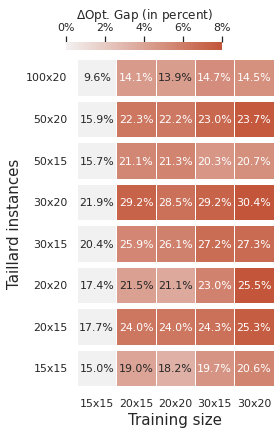

In [128]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
# from mpl_toolkits.axes_grid1.colorbar import colorbar

# sns.set_theme(style="white")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(4, 5.45))
# f, ax = plt.subplots()

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(tables_plot_diff, annot=tables_plot_, cmap=cmap, center=0, vmin=0, vmax=8,
                square=False, linewidths=.5, annot_kws={'size': 11,}, fmt=".1%",cbar=True,
                cbar_kws={"shrink": .7, 'label':r'$\Delta$' + 'Opt. Gap (in percent)' , 'format': '%.0f%%',  "use_gridspec": None, "location": "top", "anchor": (0.5, 2.4)})


for i in range(tables_plot_diff.shape[0]+1):
    ax.axhline(i, color='white', lw=6)

# cbar = ax.collections[0].colorbar
# cbar.set_label('Label for colour bar axis', labelpad=80)

ax.invert_yaxis()
ax.tick_params(axis='y', rotation=0)
ax.tick_params(axis='x', rotation=0)
ax.set(xlabel='Training size', ylabel='Taillard instances')
ax.xaxis.label.set_size(15)
ax.yaxis.label.set_size(15)

plt.autoscale()

plt.tight_layout()
plt.savefig("./output_logs/plots/base_plot.pdf", format="pdf", bbox_inches='tight')

In [ ]:
##  Plot heatmap Incremental

In [129]:
tables_inc = pd.read_excel('./tables/tables.xlsx', sheet_name=2)
tables_inc

,15 15,%,Unnamed: 2,Unnamed: 3,20 15,%.1,Unnamed: 6,Unnamed: 7,20 20,%.2,...,30 15,%.3,Unnamed: 14,Unnamed: 15,30 20,%.4,Unnamed: 18,Unnamed: 19,UB,Unnamed: 21
0,1475,19.821284,NaN,NaN,1457,18.359058,NaN,NaN,1458,18.440292,...,1453,18.034119,NaN,NaN,1477,19.983753,NaN,NaN,1231,NaN
1,1401,12.620579,NaN,NaN,1414,13.665595,NaN,NaN,1410,13.344051,...,1424,14.469453,NaN,NaN,1426,14.630225,NaN,NaN,1244,NaN
2,1393,14.367816,NaN,NaN,1397,14.696223,NaN,NaN,1413,16.009852,...,1467,20.443350,NaN,NaN,1447,18.801314,NaN,NaN,1218,NaN
3,1340,14.042553,NaN,NaN,1338,13.872340,NaN,NaN,1351,14.978723,...,1412,20.170213,NaN,NaN,1374,16.936170,NaN,NaN,1175,NaN
4,1390,13.562092,NaN,NaN,1354,10.620915,NaN,NaN,1404,14.705882,...,1433,17.075163,NaN,NaN,1388,13.398693,NaN,NaN,1224,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,6033,12.935230,NaN,NaN,6035,12.972669,NaN,NaN,6032,12.916511,...,6077,13.758892,NaN,NaN,6060,13.440659,NaN,NaN,5342,NaN
76,5865,7.891832,NaN,NaN,5792,6.548933,NaN,NaN,5945,9.363503,...,5859,7.781457,NaN,NaN,5935,9.179544,NaN,NaN,5436,NaN
77,5818,7.860586,NaN,NaN,5794,7.415647,NaN,NaN,5923,9.807193,...,6039,11.957731,NaN,NaN,6153,14.071190,NaN,NaN,5394,NaN
78,5848,9.145203,5879.900000,NaN,5794,8.137365,5851.900000,NaN,5834,8.883912,...,5955,11.142217,5993.400000,NaN,5945,10.955580,6036.8000,NaN,5358,NaN


In [130]:
tables_plot = tables_inc[['%', '%.1', '%.2', '%.3', '%.4']]
tables_plot.columns = ['15x15', '20x15', '20x20', '30x15', '30x20']
tables_plot = tables_plot.round(2)
tables_plot

,15x15,20x15,20x20,30x15,30x20
0,19.82,18.36,18.44,18.03,19.98
1,12.62,13.67,13.34,14.47,14.63
2,14.37,14.70,16.01,20.44,18.80
3,14.04,13.87,14.98,20.17,16.94
4,13.56,10.62,14.71,17.08,13.40
...,...,...,...,...,...
75,12.94,12.97,12.92,13.76,13.44
76,7.89,6.55,9.36,7.78,9.18
77,7.86,7.42,9.81,11.96,14.07
78,9.15,8.14,8.88,11.14,10.96


In [131]:
tables_plot_= tables_plot.groupby(np.arange(len(tables_plot))//10).mean()
tables_plot_= tables_plot_.rename(index={0: "15x15", 1: "20x15", 2: "20x20", 3: '30x15', 4: '30x20', 5: "50x15", 6: '50x20', 7: '100x20'})

tables_plot_ = tables_plot_ *0.01
tables_plot_

,15x15,20x15,20x20,30x15,30x20
15x15,0.14977,0.13761,0.14609,0.16481,0.16826
20x15,0.17688,0.16340,0.17059,0.21167,0.21404
20x20,0.17367,0.15986,0.17009,0.19339,0.19294
30x15,0.20413,0.18778,0.20987,0.22347,0.24661
30x20,0.21919,0.20936,0.22606,0.24684,0.26011
50x15,0.15670,0.15019,0.16352,0.17768,0.17637
50x20,0.15948,0.15216,0.17001,0.17370,0.19014
100x20,0.09577,0.09048,0.10860,0.11685,0.12499


In [132]:
def percentage_change(col1,col2):
    return ((col2 - col1)) 

In [133]:
tables_plot_diff = tables_plot_.copy()

for column in tables_plot_.columns[1:]:
    tables_plot_diff[column] = percentage_change(tables_plot_["15x15"],tables_plot_[column])

tables_plot_diff["15x15"] = percentage_change(tables_plot_["15x15"],tables_plot_["15x15"])

tables_plot_diff = tables_plot_diff * 100

In [134]:
tables_plot_diff

,15x15,20x15,20x20,30x15,30x20
15x15,0.0,-1.216,-0.368,1.504,1.849
20x15,0.0,-1.348,-0.629,3.479,3.716
20x20,0.0,-1.381,-0.358,1.972,1.927
30x15,0.0,-1.635,0.574,1.934,4.248
30x20,0.0,-0.983,0.687,2.765,4.092
50x15,0.0,-0.651,0.682,2.098,1.967
50x20,0.0,-0.732,1.053,1.422,3.066
100x20,0.0,-0.529,1.283,2.108,2.922


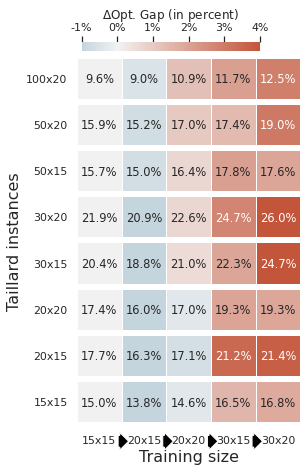

In [147]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
# from mpl_toolkits.axes_grid1.colorbar import colorbar

# sns.set_theme(style="white")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(4, 8.5))
# f, ax = plt.subplots()

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(tables_plot_diff, annot=tables_plot_, cmap=cmap, center=0,  vmin=-1, vmax=4,
                square=False, linewidths=.5, annot_kws={'size': 11.5,}, fmt=".1%",cbar=True,
                cbar_kws={ "shrink": .8, 'label': r'$\Delta$' + 'Opt. Gap (in percent)', 'format': '%.0f%%', "use_gridspec": None, "location": "top", "anchor": (0.1, -0.3)})

for i in range(tables_plot_diff.shape[0]+1):
    ax.axhline(i, color='white', lw=6)

# cbar = ax.collections[0].colorbar
# cbar.set_label('Label for colour bar axis', labelpad=80)

ax.invert_yaxis()
ax.tick_params(axis='y', rotation=0)
ax.tick_params(axis='x', rotation=0)
ax.set(xlabel='Training size', ylabel='Taillard instances')
ax.xaxis.label.set_size(16)
ax.yaxis.label.set_size(16)

# Arrows between the labels
x_coords = [0,1,2,3]
for x in x_coords:
    y = 0
    plt.text(x+0.95, y-0.4, " " , fontsize=9, bbox=dict(boxstyle="rarrow,pad=0.15", fc="black"))

# plt.tight_layout()
plt.savefig("./output_logs/plots/icl_plot.pdf", format="pdf", bbox_inches='tight')